<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2 Assignment 2*

# Document Representations: Bag-Of-Words

In [6]:
import re
import string

!pip install -U nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize # Sentence Tokenizer
from nltk.tokenize import word_tokenize # Word Tokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Requirement already up-to-date: nltk in c:\users\mhdal\anaconda3\envs\lambda-nlp\lib\site-packages (3.4.4)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mhdal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhdal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 1) (optional) Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [7]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia'

re = requests.get(url).text

soup = BeautifulSoup(re)

In [8]:
urls=[url]
for i in range(10,100,10):
    temp_url = url + '&start=' + str(i)
    urls.append(temp_url)

In [9]:
urls

['https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=10',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=20',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=30',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=40',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=50',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=60',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=70',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=80',
 'https://www.indeed.es/jobs?q=Data+scientist&l=Barcelona%2C+Barcelona+provincia&start=90']

In [10]:
def indexes_and_data(tag = 'None', class_name = 'None'):
    data = []
      #Runs if you only specify tag name

    if class_name == 'None':
        tag_list = soup.find_all(tag)
        for num in range(len(tag_list)):
            print("Index " + str(num) + ": " + tag_list[num].get_text())
            data.append(tag_list[num].get_text())
        return data
      #Runs if you only specify class name
    elif tag == 'None':
        tag_list = soup.find_all(class_ = class_name)
        for num in range(len(tag_list)):
            print("Index " + str(num) + ": " + tag_list[num].get_text())
            data.append(tag_list[num].get_text())
        return data
      #If using any of the above methods, make sure to specify parameters. 
      #Example indexes_and_data(tag= 'a') or indexes_and_data(class_name='whatever')

      #Runs if both tag name and class are specified
      #tag and class params don't need to be specified, Example indexes_and_data('a', 'whatever')
    else:
        tag_list = soup.find_all(tag, class_=class_name)
        for num in range(len(tag_list)):
            print("Index " + str(num) + ": " + tag_list[num].get_text())
            data.append(tag_list[num].get_text())
        return data

In [11]:
# urls for each page in indeed
urls=[url]
for i in range(10,100,10):
    temp_url = url + '&start=' + str(i)
    urls.append(temp_url)

In [12]:
links=[]
for url in urls:
        url_page = url
        re_page = requests.get(url_page).text

        soup_page = BeautifulSoup(re_page)
        
        productDivs = soup_page.find_all('div', attrs={'class' : 'title'})

        for div in productDivs:
            link = 'https://www.indeed.es/' + str(div.a['href'])
            links.append(link)


In [181]:
len(links)

100

In [14]:
descs=[]
for url in links:
    
        url_desc = url

        re_desc = requests.get(url_desc).text

        soup_desc = BeautifulSoup(re_desc)

        descDiv = soup_desc.find_all('div', attrs={'id' : 'jobDescriptionText'})
        for div in descDiv:
            descs.append(div.text)


In [15]:
#icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title
titles=[]
for url in links:
    
        url_title = url

        re_title = requests.get(url_title).text

        soup_title = BeautifulSoup(re_title)

        titleDiv = soup_title.find_all('div', attrs={'class' : 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title'})
        for h in titleDiv:
            titles.append(h.text)

In [16]:
titles=[]
for url in links:
    
        url_title = url

        re_title = requests.get(url_title).text

        soup_title = BeautifulSoup(re_title)

        titleDiv = soup_title.find_all('h3',class_ = 'icl-u-xs-mb--xs icl-u-xs-mt--none jobsearch-JobInfoHeader-title')
        for h in titleDiv:
            titles.append(h.text)



In [17]:
len(descs)

100

In [18]:
df = pd.DataFrame(list(zip(titles,descs)), columns = ["title", "description"])

In [182]:
df.head()

,title,description,tokens,lemmas,lammatized_sentence
0,Data Scientist – Bubble Witch 3 Saga Ads,Advertising is a growing business opportunity ...,"[growing, business, opportunity, bw3s, created...","[advertising, be, a, grow, business, opportuni...",advertising be a grow business opportunity in...
1,Game Data Scientist,GAME DATA SCIENTIST\nDo you want to be part of...,"[data, scientist, \n, do, want, worldwide, mob...","[game, data, scientist, \n, do, want, to, be, ...",game data scientist \n do want to be part of ...
2,Data Scientist,Función: Analizar grandes cantidades de datos ...,"[analizar, grandes, cantidades, de, datos, y, ...","[función, analizar, grande, cantidade, de, dat...",función analizar grande cantidade de datos mo...
3,Data Scientist Fotocasa,We are looking for a Data Scientist to join ou...,"[looking, data, scientist, join, team, fotocas...","[be, look, for, a, data, scientist, to, join, ...",be look for a data scientist to join -PRON- t...
4,Senior Marketing Data Scientist,About Typeform\n\nFounded circa 2012 in Barcel...,"[typeform, \n\n, founded, circa, 2012, barcelo...","[about, typeform, \n\n, found, circa, 2012, in...",about typeform \n\n found circa 2012 in barce...


## 2) Use Spacy to tokenize / clean the listings 

In [20]:
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [23]:
tokenizer = Tokenizer(nlp.vocab)

In [24]:
STOP_WORDS = nlp.Defaults.stop_words.union([' ','I', 'i', 'and', 'it', "it's", 'it.', 'the', 'this','of', 'is', 'my', 'but'])

In [25]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['description'], batch_size=500):
    doc_tokens = []
    for token in doc[1:]:
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
        
            
df['tokens'] = tokens

In [28]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [31]:
test = ['good','i']

In [32]:
test.is_stop

AttributeError: 'list' object has no attribute 'is_stop'

In [27]:
df['lemmas'] = df['description'].apply(get_lemmas)

In [29]:
df['lemmas'].head()

0    [advertising, be, a, grow, business, opportuni...
1    [game, data, scientist, \n, do, want, to, be, ...
2    [función, analizar, grande, cantidade, de, dat...
3    [be, look, for, a, data, scientist, to, join, ...
4    [about, typeform, \n\n, found, circa, 2012, in...
Name: lemmas, dtype: object

In [37]:
df

,title,description,tokens,lemmas
0,Data Scientist – Bubble Witch 3 Saga Ads,Advertising is a growing business opportunity ...,"[growing, business, opportunity, bw3s, created...","[advertising, be, a, grow, business, opportuni..."
1,Game Data Scientist,GAME DATA SCIENTIST\nDo you want to be part of...,"[data, scientist, \n, do, want, worldwide, mob...","[game, data, scientist, \n, do, want, to, be, ..."
2,Data Scientist,Función: Analizar grandes cantidades de datos ...,"[analizar, grandes, cantidades, de, datos, y, ...","[función, analizar, grande, cantidade, de, dat..."
3,Data Scientist Fotocasa,We are looking for a Data Scientist to join ou...,"[looking, data, scientist, join, team, fotocas...","[be, look, for, a, data, scientist, to, join, ..."
4,Senior Marketing Data Scientist,About Typeform\n\nFounded circa 2012 in Barcel...,"[typeform, \n\n, founded, circa, 2012, barcelo...","[about, typeform, \n\n, found, circa, 2012, in..."
5,Senior Customer Data Scientist,About Typeform\n\nFounded circa 2012 in Barcel...,"[typeform, \n\n, founded, circa, 2012, barcelo...","[about, typeform, \n\n, found, circa, 2012, in..."
6,VP of Data Science and Machine Learning,About Typeform\n\nFounded circa 2012 in Barcel...,"[typeform, \n\n, founded, circa, 2012, barcelo...","[about, typeform, \n\n, found, circa, 2012, in..."
7,Data Analyst,"We are TravelPerk: a fast-growing, well-funded...","[travelperk:, fast-growing,, well-funded, star...","[be, travelperk, a, fast, grow, well, fund, st..."
8,Game Data Scientist,We are looking for talented people. A rarely a...,"[looking, talented, people., a, rarely, availa...","[be, look, for, talented, people, a, rarely, a..."
9,Worldwide Supplies Data Scientist 3D Printing,Reporting into the WW 3D Current Business Dire...,"[ww, 3d, current, business, director,, charge,...","[report, into, the, ww, 3d, current, business,..."


# 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [116]:
df['tokens'][21][:10]

['fastest',
 'growing',
 'startups,',
 'glovo,',
 'constantly',
 'expanding',
 'growing',
 'teams.',
 'the',
 'dispatching']

In [117]:
df['lemmas'][21][:10]

['due', 'to', 'be', 'one', 'of', 'the', 'fast', 'grow', 'startup', 'at']

In [123]:
from itertools import chain
import itertools

In [125]:
[' '.join(bits) for bits in itertools.izip([df['lemmas'][0]])]

AttributeError: module 'itertools' has no attribute 'izip'

In [158]:
list_string = []
for i in df['lemmas']:
    stringe = ""
    for string in i:
        stringe = stringe + ' ' + string
    list_string.append(stringe)

In [161]:
list_string[:2]

[' advertising be a grow business opportunity in bw3s and have create a small agile team to support -PRON- growth on a permanent basis be look for a ds that take care of all datum analysis and operation involve in bw3s ad ds mission for this position have three area of impact operation ab test set up reporting ads business results and analysis player engagement with ad \n -PRON- role within -PRON- kingdom \n will be work with varied stakeholder in a fun dynamic and fast paced environment will help to further understand model predict segment and retain -PRON- player and be part of a community of 100 + business intelligence analytic expert \n specifically will \n proactively develop new analysis experiment and data drive tool to better understand -PRON- players’ behaviour and the performance of -PRON- game \n provide insight to support decision make for the portfolio of game in the studio \n translate business need to technical requirement and ab test and work with development team to en

In [162]:
df['lammatized_sentence'] = list_string

In [118]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['lemmas'], batch_size=500):
    doc_tokens = []
    for token in doc[1:]:
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
        
            
df['tokens2'] = tokens

TypeError: Argument 'string' has incorrect type (expected str, got list)

In [42]:
##### Your Code Here #####
vect = CountVectorizer(stop_words='english', min_df = 0.05, max_df= 0.90)
vect.fit(df['description'])

sparse_dtm = vect.transform(df['description'])

dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())


In [43]:
dtm.head()

,000,10,100,200,2012,2013,2019,24,30,40,...,world,worldwide,write,writing,written,www,year,years,yummy,zero
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,1,0,0,2,0,1,0,0,0
2,0,1,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


# 4) Visualize the most common word counts

In [60]:
##### Your Code Here #####

top_15 = dtm.describe().loc['max'].nlargest(15)
top_15

customer     33.0
crg          15.0
design       15.0
en           15.0
research     13.0
sales        13.0
autodesk     12.0
customers    12.0
analysis     11.0
business     11.0
medical      11.0
service      11.0
services     11.0
software     11.0
team         11.0
Name: max, dtype: float64

In [58]:
top_15.index

Index(['customer', 'crg', 'design', 'en', 'research', 'sales', 'autodesk',
       'customers', 'analysis', 'business', 'medical', 'service', 'services',
       'software', 'team'],
      dtype='object')

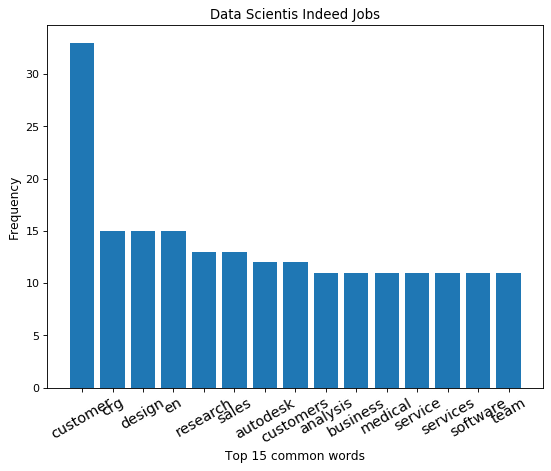

In [94]:
from matplotlib.pyplot import figure

index = np.arange(len(top_15.index))
numbers = list(top_15)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(index, numbers)
plt.xlabel('Top 15 common words', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.xticks(index, top_15.index, fontsize=13, rotation=30)
plt.title('Data Scientis Indeed Jobs')
plt.show()

In [80]:
list(top_15)

[33.0,
 15.0,
 15.0,
 15.0,
 13.0,
 13.0,
 12.0,
 12.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0,
 11.0]

<BarContainer object of 15 artists>

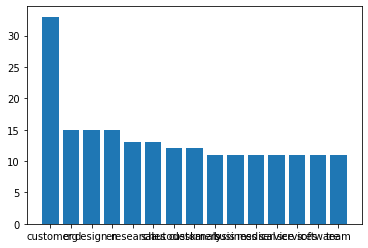

In [81]:
plt.bar(top_15.index,list(top_15))

 # 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [95]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english',min_df = 0.05, max_df= 0.90)

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(df['description'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,10,100,200,2012,2013,2019,24,30,40,...,world,worldwide,write,writing,written,www,year,years,yummy,zero
0,0.0,0.000000,0.076396,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.070648,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.049668,0.0,0.000000,0.0,...,0.023107,0.039345,0.000000,0.0,0.063603,0.0,0.04005,0.000000,0.0,0.0
2,0.0,0.158691,0.000000,0.000000,0.000000,0.0,0.259842,0.0,0.137489,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.051872,0.051872,0.0,0.000000,0.0,0.046830,0.0,...,0.020587,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.020152,0.0,0.0


In [96]:
dtm.shape

(100, 1360)

 # 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [97]:
# Instantiate
from sklearn.neighbors import NearestNeighbors


# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)


NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [98]:
nn.kneighbors([dtm.iloc[0]])

(array([[0.        , 1.13318461, 1.17653211, 1.20509819, 1.20951377]]),
 array([[ 0, 25, 34, 52, 88]], dtype=int64))

In [108]:
job_desc = ["Start-up, good pay, machine learning, perks, python, english"]

In [109]:
new = tfidf.transform(job_desc)

nn.kneighbors(new.todense())

(array([[1.26905129, 1.28837471, 1.29017707, 1.29017707, 1.30595906]]),
 array([[ 3, 78, 48, 56, 23]], dtype=int64))

In [112]:
df['description'].iloc[78]

"At Glovo we are constantly looking for passionate and experienced engineers to join our ML Platform team in our Barcelona office.\n\nTeam overview\n-------------\n\nGlovo depends heavily on machine learning to make decisions in different areas of business. The ML Platform team is responsible for providing the infrastructure and the necessary tooling for both data scientists and engineers to experiment, deploy and monitor machine learning solutions at scale.\n\nYou will\n--------\n\n\nArchitect, build and maintain the platform that enables engineers and data scientists to create, evaluate, and deploy machine learning solutions at scale\nScale our machine learning products and the team around them as our business grows\nWork closely with data scientists to understand their needs and challenges\nDevelop software using modern engineering approaches and agile principles\nOwn your deliverables from start to finish\nDeliver high quality solutions\nParticipate in high-level technical decision

## Lemmatizing the re converitng into a sentence then count vectorizing

In [163]:
##### Your Code Here #####
vect = CountVectorizer(stop_words='english', min_df = 0.05, max_df= 0.90)
vect.fit(df['lammatized_sentence'])

sparse_dtm = vect.transform(df['lammatized_sentence'])

dtm = pd.DataFrame(sparse_dtm.todense(), columns=vect.get_feature_names())


In [164]:
top_15 = dtm.describe().loc['max'].nlargest(15)
top_15

customer    42.0
pron        23.0
design      19.0
crg         15.0
en          15.0
data        14.0
team        14.0
research    13.0
sale        13.0
analysis    12.0
autodesk    12.0
datum       12.0
project     12.0
business    11.0
medical     11.0
Name: max, dtype: float64

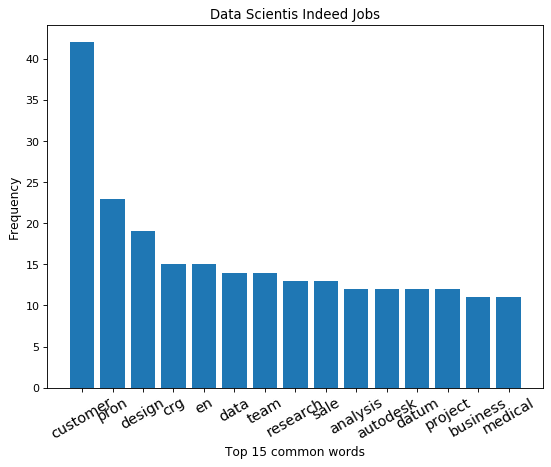

In [165]:
from matplotlib.pyplot import figure

index = np.arange(len(top_15.index))
numbers = list(top_15)
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(index, numbers)
plt.xlabel('Top 15 common words', fontsize=11)
plt.ylabel('Frequency', fontsize=11)
plt.xticks(index, top_15.index, fontsize=13, rotation=30)
plt.title('Data Scientis Indeed Jobs')
plt.show()

In [166]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words = 'english',min_df = 0.05, max_df= 0.90)

# Create a vocabulary and get word counts per document
sparse = tfidf.fit_transform(df['lammatized_sentence'])

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(sparse.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,000,10,100,200,2012,2013,2019,24,30,40,...,workplace,world,worldwide,write,written,www,year,years,yummy,zero
0,0.0,0.000000,0.061773,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.049804,0.000000,0.000000,0.037375,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.048359,0.0,0.000000,0.0,...,0.000000,0.022498,0.038308,0.030963,0.056686,0.0,0.021561,0.0,0.0,0.0
2,0.0,0.159211,0.000000,0.000000,0.000000,0.0,0.260695,0.0,0.137940,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.049963,0.049963,0.0,0.000000,0.0,0.045106,0.0,...,0.036366,0.019829,0.000000,0.000000,0.000000,0.0,0.019004,0.0,0.0,0.0


In [167]:
# Instantiate
from sklearn.neighbors import NearestNeighbors


# Fit on TF-IDF Vectors
nn  = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [168]:
nn.kneighbors([dtm.iloc[0]])

(array([[0.        , 1.07402522, 1.10353985, 1.11188221, 1.12896748]]),
 array([[ 0,  1, 25, 88, 93]], dtype=int64))

In [177]:
job_desc = ["Start-up, high salary, machine learning, perks, python, english language is a must"]

In [178]:
new = tfidf.transform(job_desc)

nn.kneighbors(new.todense())

(array([[1.28922502, 1.28934446, 1.28934446, 1.28959475, 1.29011676]]),
 array([[96, 84, 65, 59, 23]], dtype=int64))

In [180]:
df['lammatized_sentence'].iloc[65]

' summary \n posted jul 5 2019 \n weekly hours 40 \n role number 113817794 \n join the team that engineer siri and other cloud base service for international market -PRON- team be primarily responsible for make siri the good worldwide digital assistant teaching siri how to understand and speak new language be the main goal of -PRON- team together with design and implement a highly locally customize experience for -PRON- user \n be a deeply diverse and passionate group dedicate to bring the future of intelligent assistant to the world be look for a highly motivate danish speaking engineer with strong software engineering skill and high sensibility for foreign language and culture \n key qualifications \n native speaker fluency or comparable in danish and ability to work in an english speak environment \n strong software engineering fundamentals \n proficiency in at least one of the follow java c c++/objective c python \n experience with one or more version control system \n familiarity 

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.